# A basic template to apply any models to train on the collected data

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
import graphviz
plt.rcParams['figure.figsize'] = [18, 10]

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [5]:
trainDF = pd.read_csv('../outputs/trainXY.csv',parse_dates=['date_implement'])
trainDF = trainDF.sample(frac=1)

In [6]:
trainDF.head()
trainDF = trainDF.dropna()

In [7]:
# Finalizing Indexes so we can drop state names 
trainDF = trainDF.reset_index(drop=True)

# Get a list of columns with features 
columns = trainDF.columns.to_list()

In [8]:
Y_columns = [x for x in columns if 'Y_' in x]

In [9]:
X_columns = [x for x in columns if 'Y_' not in x and 'Unnamed' not in x]

X_columns.remove('date_implement')
# X_columns.remove('policy')
X_columns.remove('state_x')
X_columns.remove('policy_type')
X_columns.remove('stateName')
X_columns.remove('CEN_stateCode')
X_columns.remove('submission_date')
X_columns.remove('state_y')

X_columns.remove('caseInterpolate_gauss3')
X_columns.remove('caseInterpolate_MA7')
X_columns.remove('caseInterpolate_savitzky31_3')
X_columns.remove('caseInterpolate_gauss8')
X_columns.remove('new_case_zscore')
X_columns.remove('new_case')



In [10]:
X = trainDF[X_columns]
y = trainDF[Y_columns]


In [11]:
y

,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,1.0,2.224490,1.594725,1.0,1.687075,1.594725,-1.0,-2.617347,1.594725,1.0,11.000000,6.246154,1.0,7.380952,6.246154,1.0,3.750000,6.246154,1.0,15.642857,6.930769,1.0,10.571429,6.930769,1.0,5.464286,6.930769
1,1.0,6.173469,7.002088,1.0,6.993197,7.002088,1.0,8.698980,7.002088,1.0,2.571429,5.259231,1.0,4.428571,5.259231,1.0,6.535714,5.259231,1.0,3.285714,6.069231,1.0,5.095238,6.069231,1.0,6.000000,6.069231
2,1.0,304.734694,218.325934,1.0,245.945578,218.325934,1.0,188.545918,218.325934,1.0,368.714286,287.399231,1.0,309.095238,287.399231,1.0,255.071429,287.399231,1.0,425.500000,293.632308,1.0,341.809524,293.632308,1.0,272.321429,293.632308
3,-1.0,-62.816327,-48.922308,-1.0,-76.149660,-48.922308,-1.0,-40.719388,-48.922308,-1.0,-95.285714,-65.717692,-1.0,-73.714286,-65.717692,-1.0,-48.607143,-65.717692,-1.0,-118.142857,-69.982308,-1.0,-85.000000,-69.982308,-1.0,-69.750000,-69.982308
4,-1.0,-1.051020,-0.635495,1.0,0.476190,-0.635495,1.0,0.265306,-0.635495,-1.0,-0.357143,-0.327692,-1.0,-0.285714,-0.327692,1.0,0.035714,-0.327692,-1.0,-1.642857,-1.047692,-1.0,-1.095238,-1.047692,-1.0,-0.535714,-1.047692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,1.0,0.255102,0.070659,1.0,0.170068,0.070659,1.0,0.127551,0.070659,1.0,0.357143,0.193846,1.0,0.238095,0.193846,1.0,0.178571,0.193846,1.0,0.285714,0.130000,1.0,0.190476,0.130000,1.0,0.142857,0.130000
1579,1.0,1.051020,0.597912,1.0,0.700680,0.597912,1.0,0.525510,0.597912,1.0,1.071429,0.816154,1.0,0.857143,0.816154,1.0,0.678571,0.816154,1.0,1.357143,0.825385,1.0,0.952381,0.825385,1.0,0.714286,0.825385
1580,-1.0,-12.000000,-7.530330,-1.0,-7.115646,-7.530330,-1.0,-4.943878,-7.530330,-1.0,-4.214286,-5.354615,-1.0,-4.714286,-5.354615,-1.0,-4.892857,-5.354615,-1.0,-6.857143,-8.333077,-1.0,-7.047619,-8.333077,-1.0,-4.642857,-8.333077
1581,1.0,0.030612,0.014286,1.0,0.020408,0.014286,1.0,0.015306,0.014286,1.0,0.357143,0.158462,1.0,0.238095,0.158462,1.0,0.178571,0.158462,1.0,0.142857,0.026923,1.0,0.095238,0.026923,1.0,0.071429,0.026923


# Encoding Policy Names 

In [12]:
X['policy'].unique()

array(['C8_International travel controls', 'C1_School closing',
       'H6_Facial Coverings', 'H7_Vaccination policy',
       'C2_Workplace closing', 'C6_Stay at home requirements',
       'C5_Close public transport', 'H3_Contact tracing',
       'C4_Restrictions on gatherings', 'C3_Cancel public events',
       'H2_Testing policy', 'C7_Restrictions on internal movement',
       'H1_Public information campaigns'], dtype=object)

In [13]:
le = preprocessing.LabelEncoder()
le.fit(X['policy'])
print(le.classes_)

['C1_School closing' 'C2_Workplace closing' 'C3_Cancel public events'
 'C4_Restrictions on gatherings' 'C5_Close public transport'
 'C6_Stay at home requirements' 'C7_Restrictions on internal movement'
 'C8_International travel controls' 'H1_Public information campaigns'
 'H2_Testing policy' 'H3_Contact tracing' 'H6_Facial Coverings'
 'H7_Vaccination policy']


In [14]:
X['policy'] = pd.Series(le.transform(X['policy']))
original_policies_decoded = pd.Series(le.inverse_transform(X['policy']))

/var/folders/66/w1588p9n1654b1yky4q5nz580000gn/T/ipykernel_5808/2867200982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['policy'] = pd.Series(le.transform(X['policy']))


------

-------

# Model Input Specification

In [15]:
y

,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,1.0,2.224490,1.594725,1.0,1.687075,1.594725,-1.0,-2.617347,1.594725,1.0,11.000000,6.246154,1.0,7.380952,6.246154,1.0,3.750000,6.246154,1.0,15.642857,6.930769,1.0,10.571429,6.930769,1.0,5.464286,6.930769
1,1.0,6.173469,7.002088,1.0,6.993197,7.002088,1.0,8.698980,7.002088,1.0,2.571429,5.259231,1.0,4.428571,5.259231,1.0,6.535714,5.259231,1.0,3.285714,6.069231,1.0,5.095238,6.069231,1.0,6.000000,6.069231
2,1.0,304.734694,218.325934,1.0,245.945578,218.325934,1.0,188.545918,218.325934,1.0,368.714286,287.399231,1.0,309.095238,287.399231,1.0,255.071429,287.399231,1.0,425.500000,293.632308,1.0,341.809524,293.632308,1.0,272.321429,293.632308
3,-1.0,-62.816327,-48.922308,-1.0,-76.149660,-48.922308,-1.0,-40.719388,-48.922308,-1.0,-95.285714,-65.717692,-1.0,-73.714286,-65.717692,-1.0,-48.607143,-65.717692,-1.0,-118.142857,-69.982308,-1.0,-85.000000,-69.982308,-1.0,-69.750000,-69.982308
4,-1.0,-1.051020,-0.635495,1.0,0.476190,-0.635495,1.0,0.265306,-0.635495,-1.0,-0.357143,-0.327692,-1.0,-0.285714,-0.327692,1.0,0.035714,-0.327692,-1.0,-1.642857,-1.047692,-1.0,-1.095238,-1.047692,-1.0,-0.535714,-1.047692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,1.0,0.255102,0.070659,1.0,0.170068,0.070659,1.0,0.127551,0.070659,1.0,0.357143,0.193846,1.0,0.238095,0.193846,1.0,0.178571,0.193846,1.0,0.285714,0.130000,1.0,0.190476,0.130000,1.0,0.142857,0.130000
1579,1.0,1.051020,0.597912,1.0,0.700680,0.597912,1.0,0.525510,0.597912,1.0,1.071429,0.816154,1.0,0.857143,0.816154,1.0,0.678571,0.816154,1.0,1.357143,0.825385,1.0,0.952381,0.825385,1.0,0.714286,0.825385
1580,-1.0,-12.000000,-7.530330,-1.0,-7.115646,-7.530330,-1.0,-4.943878,-7.530330,-1.0,-4.214286,-5.354615,-1.0,-4.714286,-5.354615,-1.0,-4.892857,-5.354615,-1.0,-6.857143,-8.333077,-1.0,-7.047619,-8.333077,-1.0,-4.642857,-8.333077
1581,1.0,0.030612,0.014286,1.0,0.020408,0.014286,1.0,0.015306,0.014286,1.0,0.357143,0.158462,1.0,0.238095,0.158462,1.0,0.178571,0.158462,1.0,0.142857,0.026923,1.0,0.095238,0.026923,1.0,0.071429,0.026923


In [16]:
X = X.apply(zscore)
y = y.apply(zscore)

In [17]:
y

,Y_TREND_caseInterpolate_MA7_14,Y_TRENDQUANT_caseInterpolate_MA7_14,Y_SLOPE_caseInterpolate_MA7_14,Y_TREND_caseInterpolate_MA7_21,Y_TRENDQUANT_caseInterpolate_MA7_21,Y_SLOPE_caseInterpolate_MA7_21,Y_TREND_caseInterpolate_MA7_28,Y_TRENDQUANT_caseInterpolate_MA7_28,Y_SLOPE_caseInterpolate_MA7_28,Y_TREND_caseInterpolate_gauss8_14,Y_TRENDQUANT_caseInterpolate_gauss8_14,Y_SLOPE_caseInterpolate_gauss8_14,Y_TREND_caseInterpolate_gauss8_21,Y_TRENDQUANT_caseInterpolate_gauss8_21,Y_SLOPE_caseInterpolate_gauss8_21,Y_TREND_caseInterpolate_gauss8_28,Y_TRENDQUANT_caseInterpolate_gauss8_28,Y_SLOPE_caseInterpolate_gauss8_28,Y_TREND_caseInterpolate_gauss3_14,Y_TRENDQUANT_caseInterpolate_gauss3_14,Y_SLOPE_caseInterpolate_gauss3_14,Y_TREND_caseInterpolate_gauss3_21,Y_TRENDQUANT_caseInterpolate_gauss3_21,Y_SLOPE_caseInterpolate_gauss3_21,Y_TREND_caseInterpolate_gauss3_28,Y_TRENDQUANT_caseInterpolate_gauss3_28,Y_SLOPE_caseInterpolate_gauss3_28
0,0.799121,0.000555,0.027120,0.831279,0.030071,0.027120,-1.284388,-0.039022,0.027120,0.771540,0.170338,0.106922,0.770461,0.126072,0.106922,0.771502,0.074417,0.106922,0.796234,0.177880,0.095811,0.823255,0.153715,0.095811,0.829982,0.095849,0.095811
1,0.799121,0.052666,0.115384,0.831279,0.118751,0.115384,0.829111,0.158917,0.115384,0.771540,0.030642,0.089414,0.770461,0.073569,0.089414,0.771502,0.127342,0.089414,0.796234,0.018399,0.082444,0.823255,0.067108,0.082444,0.829982,0.105233,0.082444
2,0.799121,3.992474,3.564810,0.831279,4.112316,3.564810,0.829111,3.304692,3.564810,0.771540,6.099133,5.094426,0.770461,5.491568,5.094426,0.771502,4.849149,5.094426,0.796234,5.467492,4.544086,0.823255,5.392312,4.544086,0.829982,4.770300,4.544086
3,-1.334114,-0.857722,-0.797467,-1.280944,-1.270800,-0.797467,-1.284388,-0.705480,-0.797467,-1.334231,-1.591253,-1.169678,-1.332367,-1.316074,-1.169678,-1.330543,-0.920290,-1.169678,-1.351021,-1.548756,-1.097522,-1.307919,-1.357767,-1.097522,-1.296008,-1.221656,-1.097522
4,-1.334114,-0.042668,-0.009284,0.831279,0.009833,-0.009284,0.829111,0.011400,-0.009284,-1.334231,-0.017896,-0.009695,-1.332367,-0.010267,-0.009695,0.771502,0.003851,-0.009695,-1.351021,-0.045209,-0.027978,-1.307919,-0.030796,-0.027978,-1.296008,-0.009251,-0.027978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.799121,-0.025433,0.002242,0.831279,0.004717,0.002242,0.829111,0.008990,0.002242,0.771540,-0.006058,-0.000443,0.770461,-0.000952,-0.000443,0.771502,0.006565,-0.000443,0.796234,-0.020319,-0.009705,0.823255,-0.010462,-0.009705,0.829982,0.002635,-0.009705
1579,0.799121,-0.014930,0.010849,0.831279,0.013585,0.010849,0.829111,0.015951,0.010849,0.771540,0.005781,0.010596,0.770461,0.010057,0.010596,0.771502,0.016065,0.010596,0.796234,-0.006491,0.001084,0.823255,0.001588,0.001084,0.829982,0.012645,0.001084
1580,-1.334114,-0.187151,-0.121828,-1.280944,-0.117048,-0.121828,-1.284388,-0.079716,-0.121828,-1.334231,-0.081825,-0.098870,-1.332367,-0.089022,-0.098870,-1.330543,-0.089784,-0.098870,-1.351021,-0.112504,-0.141013,-1.307919,-0.124934,-0.141013,-1.296008,-0.081195,-0.141013
1581,0.799121,-0.028395,0.001322,0.831279,0.002216,0.001322,0.829111,0.007027,0.001322,0.771540,-0.006058,-0.001071,0.770461,-0.000952,-0.001071,0.771502,0.006565,-0.001071,0.796234,-0.022162,-0.011305,0.823255,-0.011968,-0.011305,0.829982,0.001384,-0.011305


In [99]:
y_selected = y[['Y_SLOPE_caseInterpolate_gauss3_21']]

# Apply model here

In [100]:
len(X)

1583

In [101]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np



krr = KernelRidge(alpha=50.0)
krr.fit(X[:1500], y_selected[:1500])

KernelRidge(alpha=50.0)

In [102]:
T = pd.DataFrame(krr.predict(X[1500:]))

In [103]:
model_output = pd.DataFrame(krr.predict(X[1500:]))
actual_value = y_selected[1500:].reset_index().apply(zscore)
actual_value = actual_value.drop(columns=['index'])

In [104]:
result = pd.concat([actual_value, model_output], axis=1)

In [105]:
result.columns

Index(['Y_SLOPE_caseInterpolate_gauss3_21', 0], dtype='object')

In [106]:
result['diff'] = result['Y_SLOPE_caseInterpolate_gauss3_21'] - result[0]

In [107]:
result['diff'].mean()

-0.007103597234159017

In [108]:
0.03625768498035307

0.03625768498035307

<AxesSubplot:>

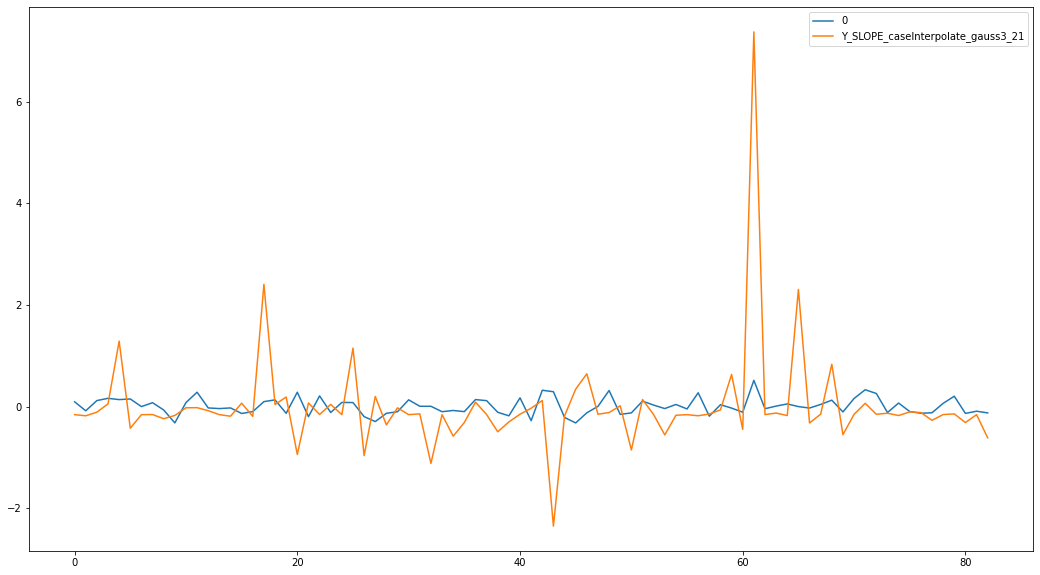

In [109]:
ax = model_output.plot() 


actual_value.plot(ax=ax)

<AxesSubplot:>

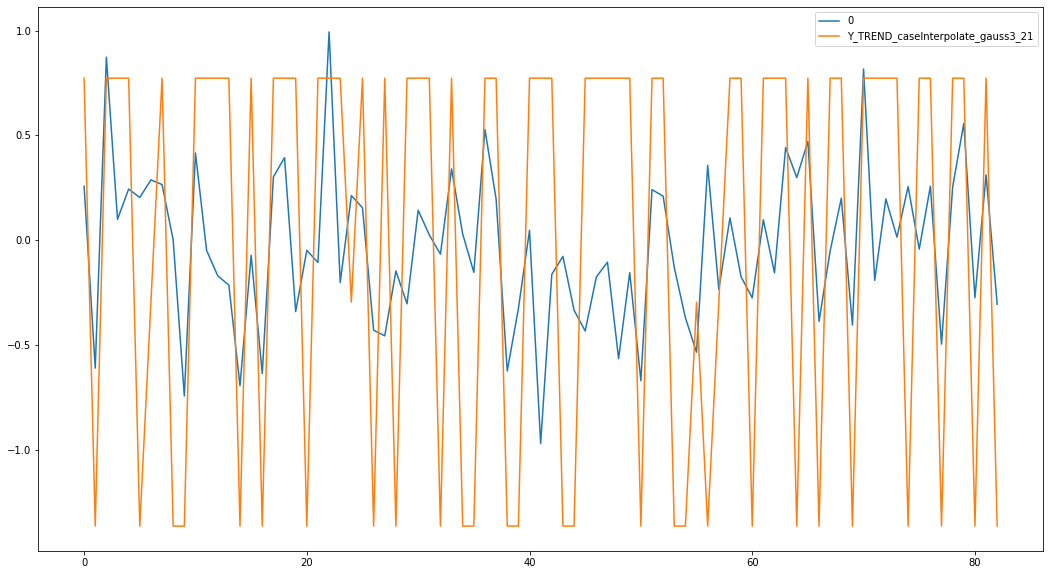

In [87]:
ax = model_output.plot() 


actual_value.plot(ax=ax)

<AxesSubplot:>

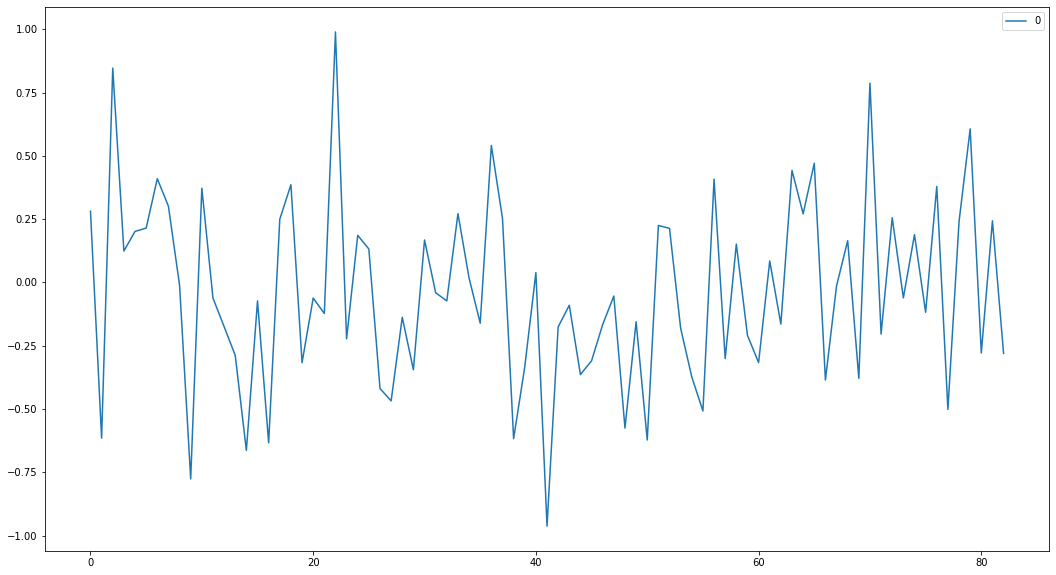

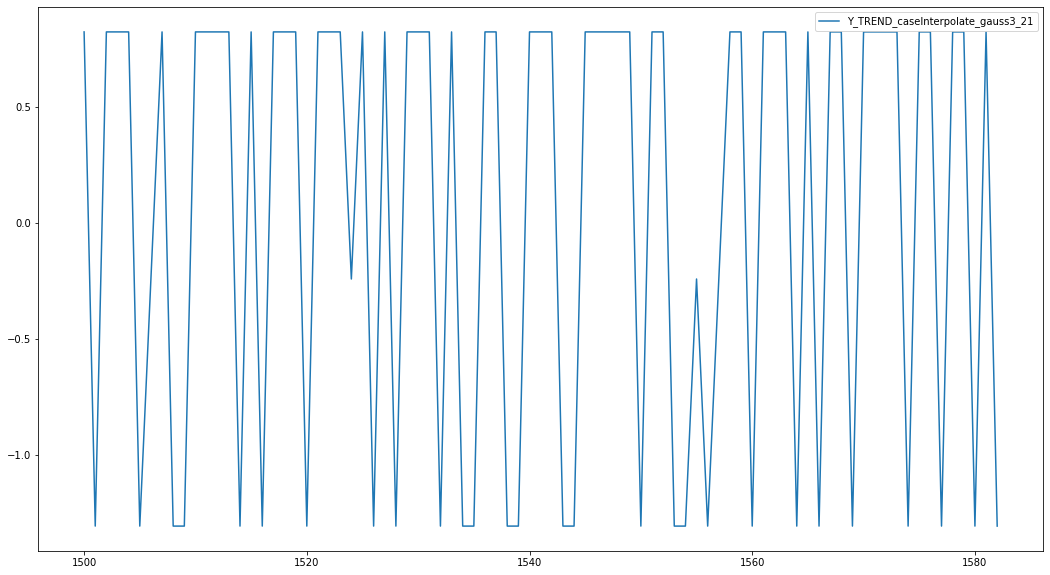

In [61]:
T.plot()
y_selected[1500:].plot()